## Задание
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

Рекомендации по выполнению проекта

Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.

Посмотрите на распределение признака для числовых переменных, устраните выбросы.

Оцените количество уникальных значений для номинативных переменных.

По необходимости преобразуйте данные

Проведите корреляционный анализ количественных переменных

Отберите не коррелирующие переменные.

Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).

Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
# Импорт библиотек:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
#warnings.filterwarnings('ignore')

In [2]:

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# Загрузка файла:
stud_math = pd.read_csv('stud_math.csv')

In [3]:
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


# Разведывательный анализ данных (EDA)

In [4]:
# функции для обработки данных в столбцах

# для столбцов с данными из цифр
def fix_int_columns(x):
    if pd.isnull(x):
        return None
    if x == 'None':
        return None
    return x


# для столбцов с данными из букв
def fix_str_columns(x):   
    if pd.isnull(x):
        return None
    if x == 'NaN':
        return None
    if x == 'nan':
        return None
    if x.strip() == '':
        return None
    return x
   

### 1. Первичный анализ данных в столбцах

 Приводим названия заголовков столбцов к единому виду

In [5]:
stud_math.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_edu', 'father_edu', 
                     'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures', 
                     'school_sup', 'family_sup', 'paid', 'activities', 'nursery', 'studytime_granular', 'higher', 
                     'internet', 'romantic', 'family_rel', 'free_time', 'go_out', 'health', 'absences', 'score']

In [6]:
stud_math.head()

,school,sex,age,address,family_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_sup,family_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,family_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [7]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   family_size         368 non-null    object 
 5   parents_status      350 non-null    object 
 6   mother_edu          392 non-null    float64
 7   father_edu          371 non-null    float64
 8   mother_job          376 non-null    object 
 9   father_job          359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  travel_time         367 non-null    float64
 13  study_time          388 non-null    float64
 14  failures            373 non-null    float64
 15  school_sup          386 non-null    object 
 16  family_s

По общей информации датасета видно, что в столбцах присутствуют нулевые значения. Для нашего проекта примем, что если их около 10 % и более, то необходимо их заполнить определенной информацией (модой, средним и т.д.)

## school — аббревиатура школы, в которой учится ученик

In [8]:
stud_math.school.describe()

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

In [9]:
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


In [10]:
stud_math.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В данном столбце пропусков и выбросов нет

## sex — пол ученика ('F' - женский, 'M' - мужской)

In [11]:
stud_math.sex.describe()

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

In [12]:
pd.DataFrame(stud_math.sex.value_counts())

,sex
F,208
M,187


In [13]:
stud_math.loc[:, ['sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В данном столбце пропусков и выбросов нет

## age — возраст ученика (от 15 до 22)

In [14]:
stud_math.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


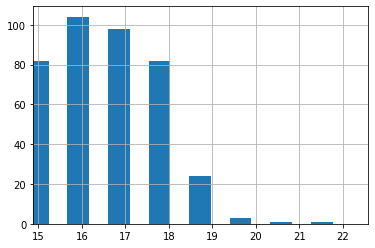

In [15]:
stud_math.age.hist(bins=15, width = -0.5, align = 'right')

В данном столбце пропусков и выбросов нет

## address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [16]:
stud_math.address.describe()

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

In [17]:
stud_math.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [18]:
stud_math.address = stud_math.address.apply(fix_str_columns)
pd.DataFrame(stud_math.address.value_counts())

,address
U,295
R,83


В данном столбце присуствуют нулевые значения 4,3% от общего кол-ва данных. 

## family_size — размер семьи('LE3' <= 3, 'GT3' >3)

In [19]:
stud_math.family_size.describe()

count     368
unique      2
top       GT3
freq      261
Name: family_size, dtype: object

In [20]:
stud_math.family_size = stud_math.family_size.apply(fix_str_columns)
pd.DataFrame(stud_math.family_size.value_counts())

,family_size
GT3,261
LE3,107


In [21]:
stud_math.loc[:, ['family_size']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   family_size  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В данном столбце присуствуют нулевые значения 6,8% от общего кол-ва данных. Заполним их из учета столбца parent_status. Если родители живут вместе, то присваеваем GT3 значение, если раздельно то LE3 см. столбец parents_status

## parents_status — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [22]:
stud_math.parents_status.describe()

count     350
unique      2
top         T
freq      314
Name: parents_status, dtype: object

In [23]:
stud_math.loc[:, ['parents_status']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   parents_status  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [24]:
stud_math.parents_status = stud_math.parents_status.apply(fix_str_columns)
pd.DataFrame(stud_math.parents_status.value_counts())

,parents_status
T,314
A,36


Так как большое кол-во данных отсутствует, заполним пропуски модой

In [25]:
stud_math.parents_status = stud_math.parents_status.apply(lambda x: stud_math.parents_status.mode()[0] if pd.isnull(x) else x)

In [26]:
pd.DataFrame(stud_math.parents_status.value_counts())

,parents_status
T,359
A,36


In [27]:
# добавляем данные в столбец parents_status:
for i in stud_math.index:
    if stud_math.parents_status[i] == 'T' and stud_math.family_size[i] == None:
        stud_math.family_size[i] = 'GT3'
    elif stud_math.parents_status[i] == 'A' and stud_math.family_size[i] == None:
        stud_math.family_size[i] = 'LE3'
    else:
        continue

<ipython-input-27-b73b8674d9aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.family_size[i] = 'LE3'
<ipython-input-27-b73b8674d9aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.family_size[i] = 'GT3'


In [28]:
pd.DataFrame(stud_math.family_size.value_counts())

,family_size
GT3,285
LE3,110


## mother_edu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [29]:
stud_math.mother_edu.describe()

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: mother_edu, dtype: float64

In [30]:
stud_math.loc[:, ['mother_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mother_edu  392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [31]:
display(pd.DataFrame(stud_math.mother_edu.value_counts()))

,mother_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


In [32]:
# Так как данные категориальные, переведем типы данных в object
stud_math.mother_edu = stud_math.mother_edu.astype('str')
stud_math.mother_edu = stud_math.mother_edu.apply(fix_str_columns)

## father_edu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [33]:
stud_math.loc[:, ['father_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   father_edu  371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [34]:
display(pd.DataFrame(stud_math.father_edu.value_counts()))

,father_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


В данных присутствует ошибка, скорее всего опечатка. Так как она явная, исправим значение.

In [35]:
stud_math.loc[stud_math.father_edu == 40.0, 'father_edu'] = 4.0

Так как в данных много пропусков, заполним их модой

In [36]:
stud_math.father_edu = stud_math.father_edu.apply(lambda x: stud_math.father_edu.mode()[0] if pd.isnull(x) else x)

In [37]:
# Так как данные категориальные, переведем типы данных в object
stud_math.mother_edu = stud_math.mother_edu.astype('str')
stud_math.mother_edu = stud_math.mother_edu.apply(fix_str_columns)

## mother_job — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [38]:
stud_math.mother_job.describe()

count       376
unique        5
top       other
freq        133
Name: mother_job, dtype: object

In [39]:
stud_math.loc[:, ['mother_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mother_job  376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [40]:
stud_math.mother_job = stud_math.mother_job.apply(fix_str_columns)

In [41]:
display(pd.DataFrame(stud_math.mother_job.value_counts()))

,mother_job
other,133
services,98
at_home,58
teacher,55
health,32


В данном столбце присуствуют нулевые значения 4,8% от общего кол-ва данных.

## father_job — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [42]:
stud_math.father_job.describe()

count       359
unique        5
top       other
freq        197
Name: father_job, dtype: object

In [43]:
stud_math.loc[:, ['father_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   father_job  359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [44]:
stud_math.father_job = stud_math.father_job.apply(fix_str_columns)

In [45]:
display(pd.DataFrame(stud_math.father_job.value_counts()))

,father_job
other,197
services,102
teacher,29
at_home,16
health,15


In [46]:
# так как пропусков около 10 процентов, заполним пропуски модой

In [47]:
stud_math.father_job = stud_math.father_job.apply(lambda x: stud_math.father_job.mode()[0] if pd.isnull(x) else x)

In [48]:
display(pd.DataFrame(stud_math.father_job.value_counts()))

,father_job
other,233
services,102
teacher,29
at_home,16
health,15


## reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [49]:
stud_math.reason = stud_math.reason.apply(fix_str_columns)
stud_math.reason.describe()

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

In [50]:
stud_math.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [51]:
display(pd.DataFrame(stud_math.reason.value_counts()))

,reason
course,137
home,104
reputation,103
other,34


В данном столбце присуствуют нулевые значения 4,3% от общего кол-ва данных.

## guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [52]:
stud_math.guardian = stud_math.guardian.apply(fix_str_columns)
stud_math.guardian.describe()

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

In [53]:
stud_math.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [54]:
display(pd.DataFrame(stud_math.guardian.value_counts()))

,guardian
mother,250
father,86
other,28


В данном столбце присуствуют нулевые значения 7,8% от общего кол-ва данных.

## travel_time — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [55]:
stud_math.travel_time.describe()

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travel_time, dtype: float64

In [56]:
stud_math.loc[:, ['travel_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [57]:
display(pd.DataFrame(stud_math.travel_time.value_counts()))

,travel_time
1.0,242
2.0,96
3.0,22
4.0,7


In [58]:
#преобразуем данные, 1 если <15 минут, 2 если >15 минут

In [59]:
stud_math.travel_time = stud_math.travel_time.apply(lambda x: 2 if x > 1 else x)

In [60]:
display(pd.DataFrame(stud_math.travel_time.value_counts()))

,travel_time
1.0,242
2.0,125


In [61]:
# Так как данные категориальные, переведем типы данных в object
stud_math.travel_time = stud_math.travel_time.astype('str')
stud_math.travel_time = stud_math.travel_time.apply(fix_str_columns)

В данном столбце присуствуют нулевые значения 7,1% от общего кол-ва данных.

## study_time — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [62]:
stud_math.study_time.describe()

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: study_time, dtype: float64

In [63]:
stud_math.loc[:, ['study_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [64]:
display(pd.DataFrame(stud_math.study_time.value_counts()))

,study_time
2.0,194
1.0,103
3.0,64
4.0,27


In [65]:
# Так как данные категориальные, переведем типы данных в object
stud_math.study_time = stud_math.study_time.astype('str')
stud_math.study_time = stud_math.study_time.apply(fix_str_columns)

В данном столбце присуствуют нулевые значения 1,7% от общего кол-ва данных.

## failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [66]:
stud_math.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [67]:
display(pd.DataFrame(stud_math.failures.value_counts()))

,failures
0.0,293
1.0,49
2.0,16
3.0,15


In [68]:
#преобразуем данные, значение 1 если неудач от 1 до 3, иначе 0

In [69]:
stud_math.failures = stud_math.failures.apply(lambda x: 1 if 1<=x<=3 else x)

In [70]:
display(pd.DataFrame(stud_math.failures.value_counts()))

,failures
0.0,293
1.0,80


In [71]:
# Так как данные категориальные, переведем типы данных в object
stud_math.failures = stud_math.failures.astype('str')
stud_math.failures = stud_math.failures.apply(fix_str_columns)

В данном столбце присуствуют нулевые значения 5,6% от общего кол-ва данных.

## school_sup — дополнительная образовательная поддержка (yes или no)

In [72]:
stud_math.loc[:, ['school_sup']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_sup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [73]:
display(pd.DataFrame(stud_math.school_sup.value_counts()))

,school_sup
no,335
yes,51


В данном столбце присуствуют нулевые значения 2,3% от общего кол-ва данных.

## family_sup — семейная образовательная поддержка (yes или no)

In [74]:
stud_math.loc[:, ['family_sup']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   family_sup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [75]:
display(pd.DataFrame(stud_math.family_sup.value_counts()))

,family_sup
yes,219
no,137


В данном столбце присуствуют нулевые значения 10% от общего кол-ва данных. Отсутствующих данных много, но заполнить не представляется возможным.

## paid — дополнительные платные занятия по математике (yes или no)

In [76]:
stud_math.paid = stud_math.paid.apply(fix_str_columns)
stud_math.paid.describe()

count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

In [77]:
display(pd.DataFrame(stud_math.paid.value_counts()))

,paid
no,200
yes,155


В данном столбце присуствуют нулевые значения 10% от общего кол-ва данных. Отсутствующих данных много, но заполнить не представляется возможным.

## activities — дополнительные внеучебные занятия (yes или no)

In [78]:
stud_math.activities = stud_math.activities.apply(fix_str_columns)
stud_math.activities.describe()

count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

In [79]:
display(pd.DataFrame(stud_math.activities.value_counts()))

,activities
yes,195
no,186


В данном столбце присуствуют нулевые значения 3,5% от общего кол-ва данных.

## nursery — посещал детский сад (yes или no)

In [80]:
stud_math.nursery = stud_math.nursery.apply(fix_str_columns)
stud_math.nursery.describe()

count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

In [81]:
display(pd.DataFrame(stud_math.nursery.value_counts()))

,nursery
yes,300
no,79


В данном столбце присуствуют нулевые значения 4,1% от общего кол-ва данных.

## studytime_granular

In [82]:
stud_math.studytime_granular = stud_math.studytime_granular.apply(fix_int_columns)
stud_math.studytime_granular.describe()

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

In [83]:
display(pd.DataFrame(stud_math.studytime_granular.value_counts()))

,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


В данном столбце присуствуют нулевые значения 1,7% от общего кол-ва данных.

## higher — хочет получить высшее образование (yes или no)

In [84]:
stud_math.higher = stud_math.higher.apply(fix_str_columns)
stud_math.higher.describe()

count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

In [85]:
display(pd.DataFrame(stud_math.higher.value_counts()))

,higher
yes,356
no,19


В данном столбце присуствуют нулевые значения 5% от общего кол-ва данных.

## internet — наличие интернета дома (yes или no)

In [86]:
stud_math.internet  = stud_math.internet .apply(fix_str_columns)
stud_math.internet.describe()

count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

In [87]:
display(pd.DataFrame(stud_math.internet .value_counts()))

,internet
yes,305
no,56


В данном столбце присуствуют нулевые значения 8,6% от общего кол-ва данных.

## romantic — в романтических отношениях (yes или no)

In [88]:
stud_math.romantic  = stud_math.romantic.apply(fix_str_columns)
stud_math.romantic.describe()

count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

In [89]:
display(pd.DataFrame(stud_math.romantic.value_counts()))

,romantic
no,240
yes,124


В данном столбце присуствуют нулевые значения 7,8% от общего кол-ва данных.

## family_rel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [90]:
stud_math.loc[:, ['family_rel']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   family_rel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [91]:
display(pd.DataFrame(stud_math.family_rel.value_counts()))

,family_rel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


В данных данного столбца есть 1 выброс, также скорее весго это опечатка, можно исправить. т.к. корректировка будет незначительна.

In [92]:
stud_math.loc[stud_math.family_rel == -1.0, 'family_rel'] = 1.0

In [93]:
# Так как данные категориальные, переведем типы данных в object
stud_math.family_rel = stud_math.family_rel.astype('str')
stud_math.family_rel = stud_math.family_rel.apply(fix_str_columns)

В данном столбце присуствуют нулевые значения 6,8% от общего кол-ва данных.

# free_time — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [94]:
stud_math.loc[:, ['free_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [95]:
display(pd.DataFrame(stud_math.free_time.value_counts()))

,free_time
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [96]:
# Так как данные категориальные, переведем типы данных в object
stud_math.free_time = stud_math.free_time.astype('str')
stud_math.free_time = stud_math.free_time.apply(fix_str_columns)

В данном столбце присуствуют нулевые значения 2,7% от общего кол-ва данных.

## go_out — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [97]:
stud_math.loc[:, ['go_out']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [98]:
display(pd.DataFrame(stud_math.go_out.value_counts()))

,go_out
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [99]:
# Так как данные категориальные, переведем типы данных в object
stud_math.go_out = stud_math.go_out.astype('str')
stud_math.go_out = stud_math.go_out.apply(fix_str_columns)

В данном столбце присуствуют нулевые значения 2% от общего кол-ва данных.

## health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [100]:
stud_math.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [101]:
display(pd.DataFrame(stud_math.health.value_counts()))

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [102]:
# Так как данные категориальные, переведем типы данных в object
stud_math.health = stud_math.health.astype('str')
stud_math.health = stud_math.health.apply(fix_str_columns)

В данном столбце присуствуют нулевые значения 3,8% от общего кол-ва данных.

## absences — количество пропущенных занятий

In [103]:
stud_math.absences  = stud_math.absences.apply(fix_int_columns)
stud_math.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

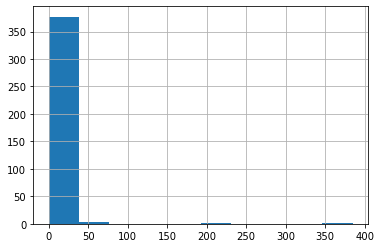

In [104]:
stud_math.absences.hist()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


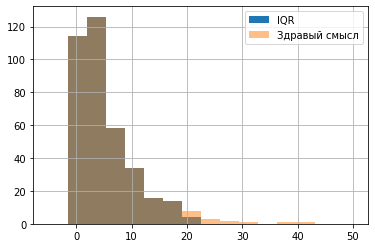

In [105]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (-5, 50),
                                                                                             label = 'IQR')
stud_math.absences.loc[stud_math.absences <= 100].hist(alpha = 0.5, bins = 16, range = (-5, 50),
                                                        label = 'Здравый смысл')
plt.legend();

Мы видим что формула выбросов в нашем случае помечает как выбросы незначительное количество потенциально реальных значений, поэтому воспользуемся IQR. И удалим значения в столбцах больше 20 пропусков.

In [106]:
stud_math.absences = stud_math.absences.apply(lambda x: None if x > 20 else x)

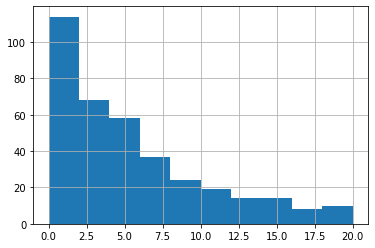

In [107]:
stud_math.absences.hist()

## score — баллы по госэкзамену по математике

In [108]:
stud_math.score  = stud_math.score.apply(fix_int_columns)
stud_math.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

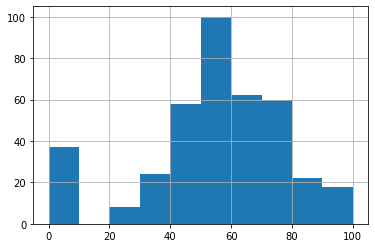

In [109]:
stud_math.score.hist()

In [110]:
#stud_math.score = stud_math.score.apply(lambda x: round(stud_math[stud_math.score > 0].score.median(), 1) if x == 0 else x)

In [111]:
#stud_math.score.hist()

# Корреляционный анализ

In [112]:
stud_math.corr()

,age,father_edu,studytime_granular,absences,score
age,1.000000,-0.154781,0.015556,0.151493,-0.155726
father_edu,-0.154781,1.000000,-0.007778,-0.024968,0.124829
studytime_granular,0.015556,-0.007778,1.000000,0.078099,-0.115741
absences,0.151493,-0.024968,0.078099,1.000000,0.081274
score,-0.155726,0.124829,-0.115741,0.081274,1.000000


In [116]:
stud_math.corr(method='spearman')

,age,father_edu,studytime_granular,absences,score
age,1.000000,-0.140802,-0.019565,0.112412,-0.164656
father_edu,-0.140802,1.000000,-0.036589,-0.020205,0.143443
studytime_granular,-0.019565,-0.036589,1.000000,0.041152,-0.122527
absences,0.112412,-0.020205,0.041152,1.000000,0.034116
score,-0.164656,0.143443,-0.122527,0.034116,1.000000


Так как переменные studytime_granular и study_time скоррелированы полностью, а также видно что скоррелированы переменные father_edu и mother_edu, исключим переменные studytime_granular и father_edu.

In [117]:
stud_math.drop(['studytime_granular', 'father_edu'], inplace = True, axis = 1)

# Анализ номинативных переменных

In [118]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

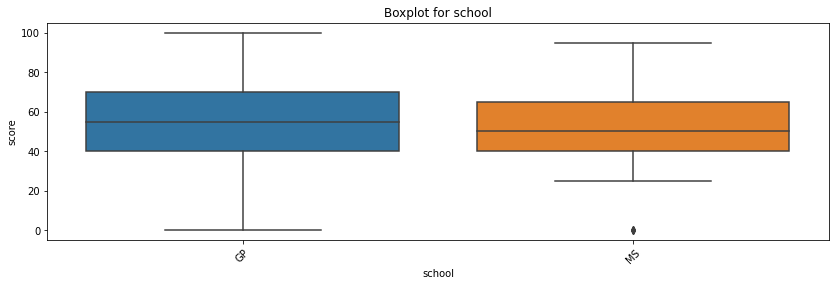

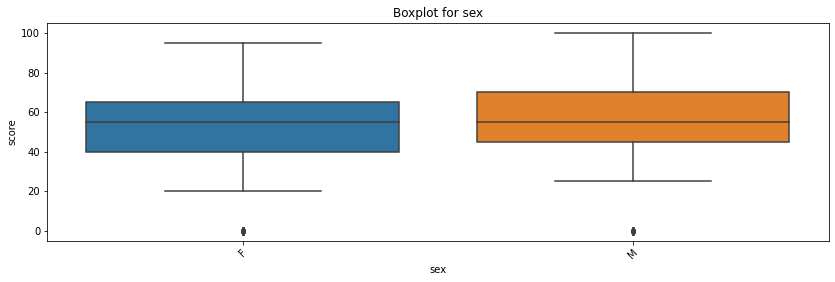

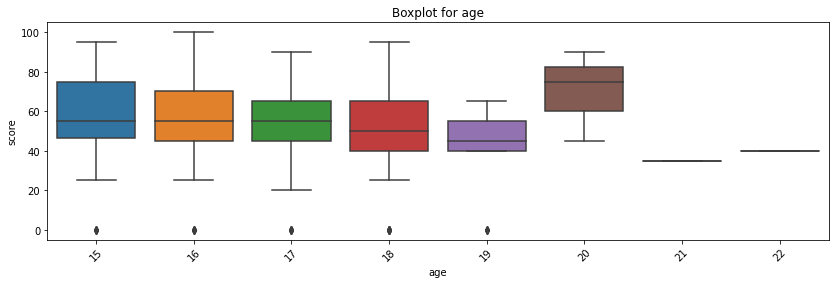

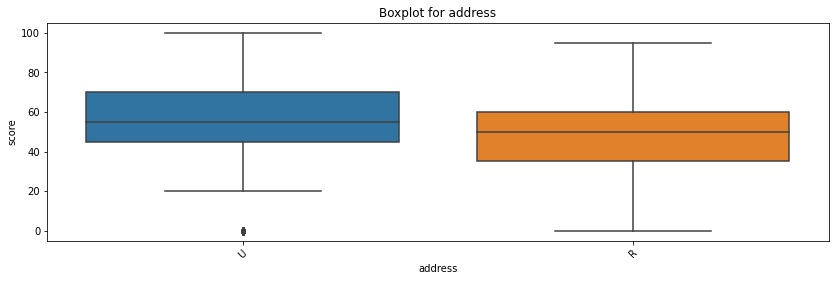

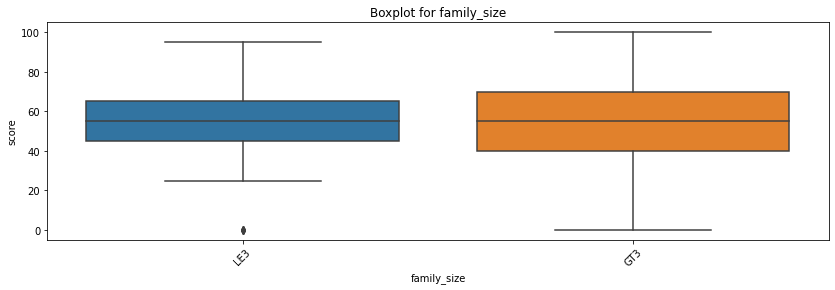

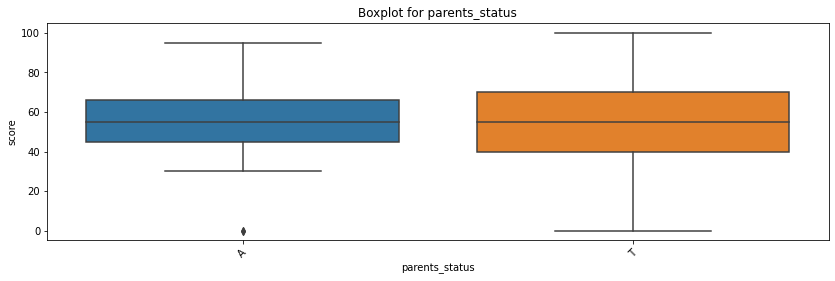

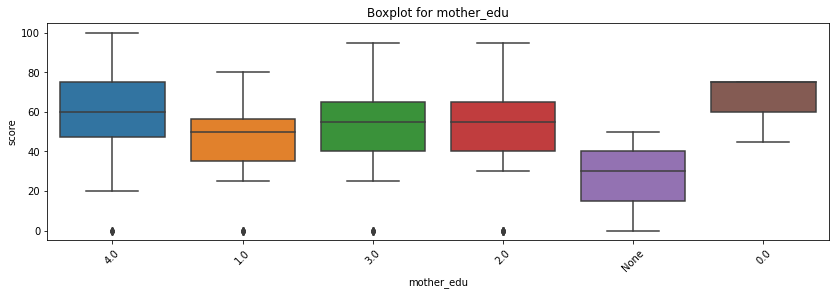

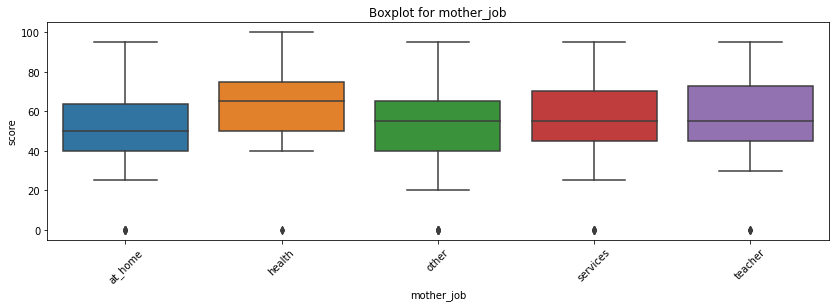

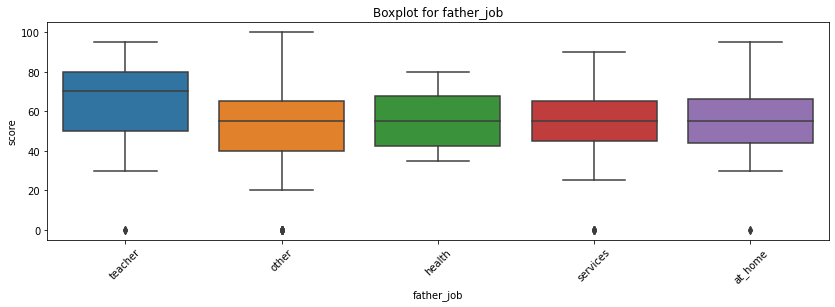

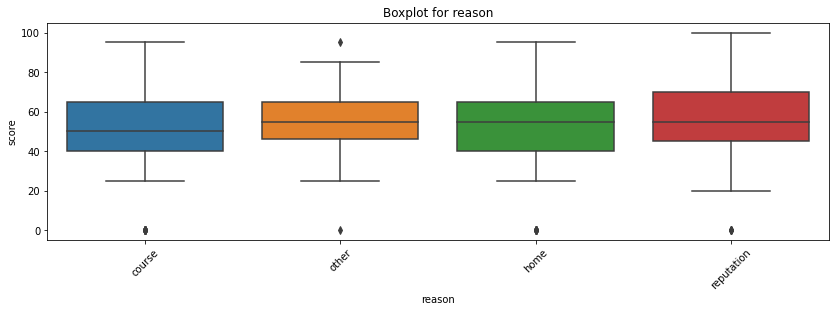

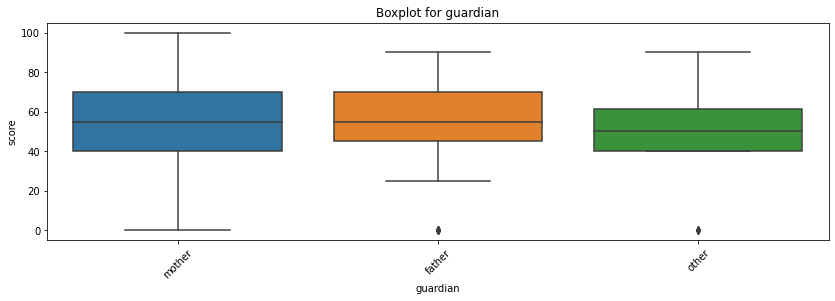

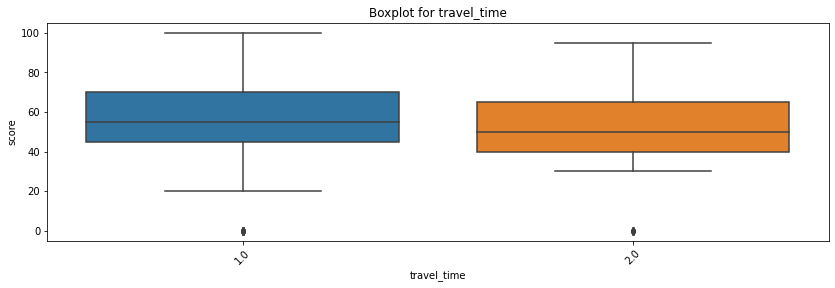

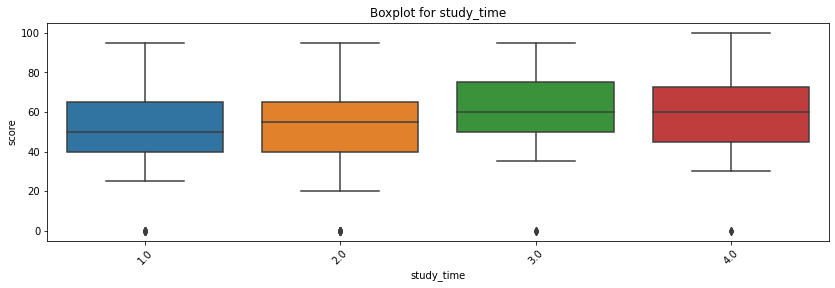

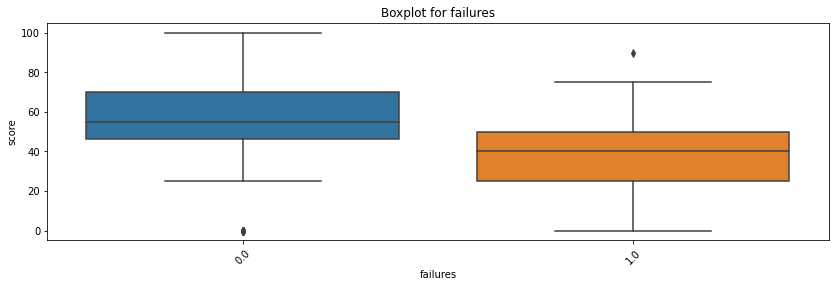

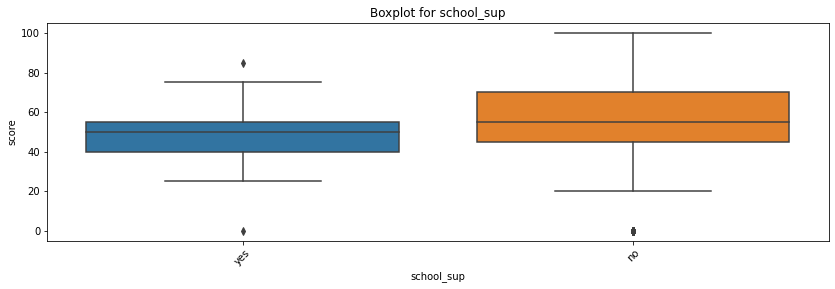

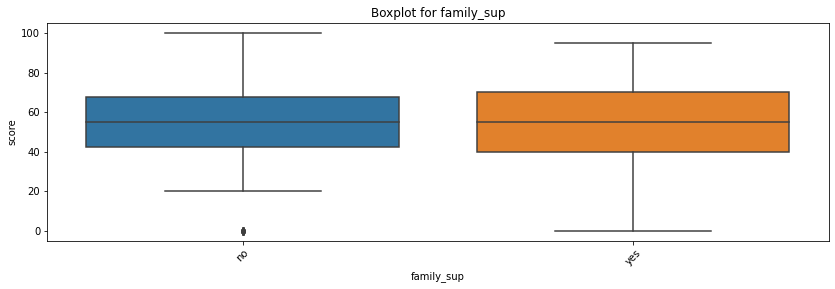

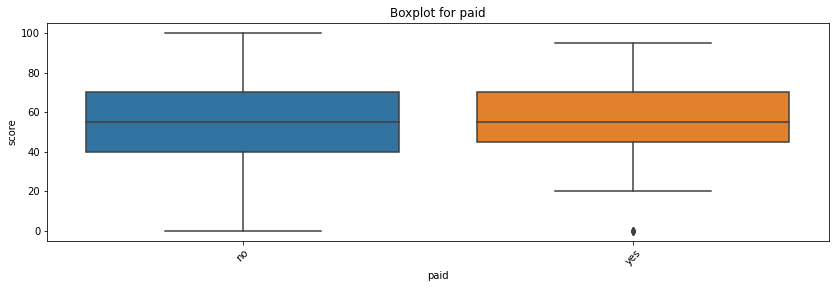

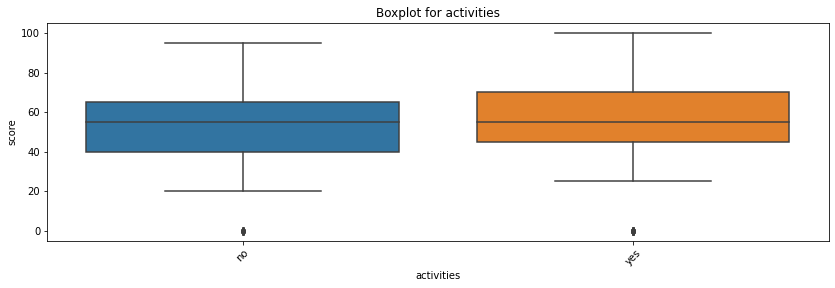

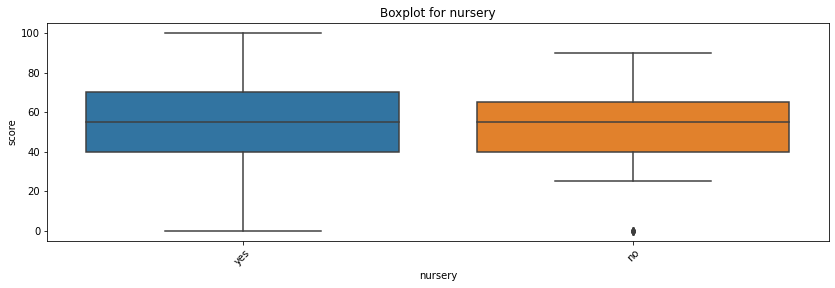

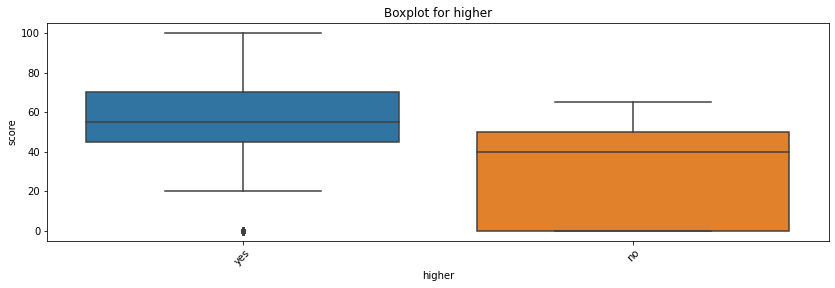

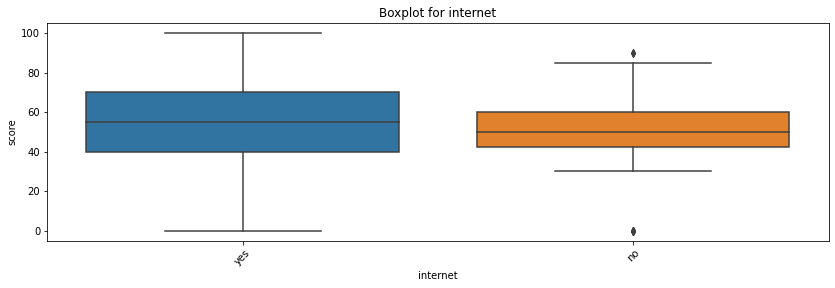

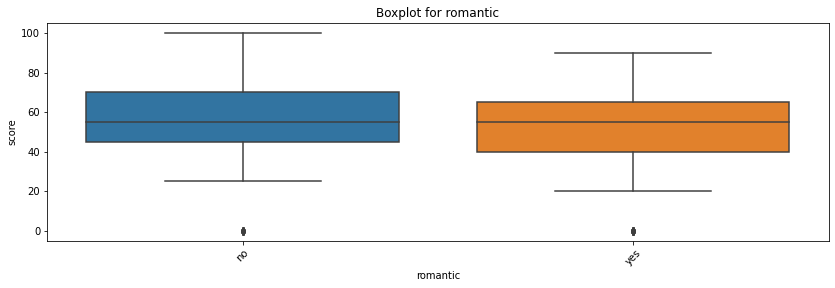

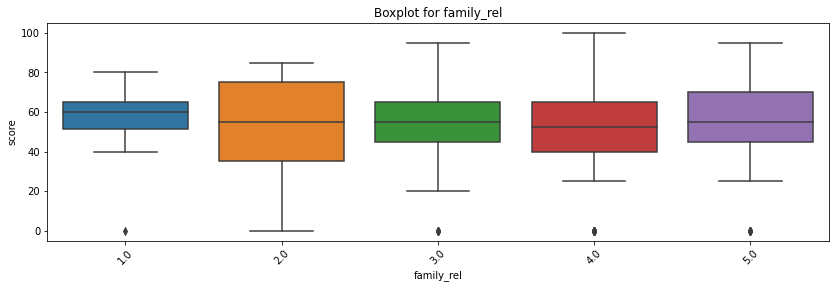

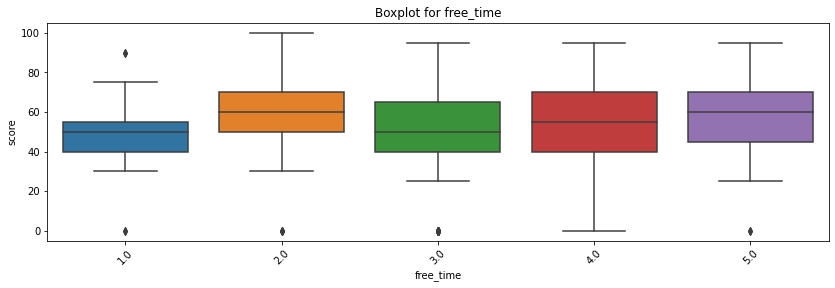

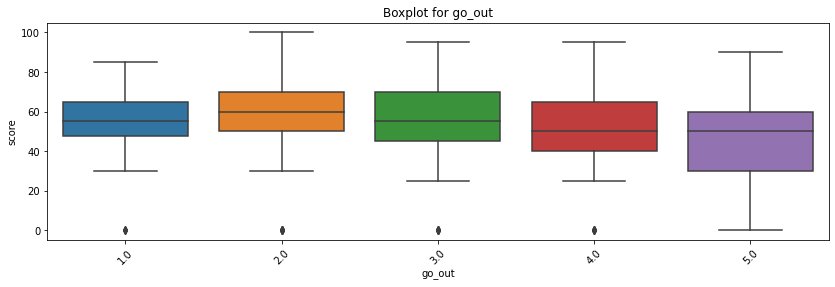

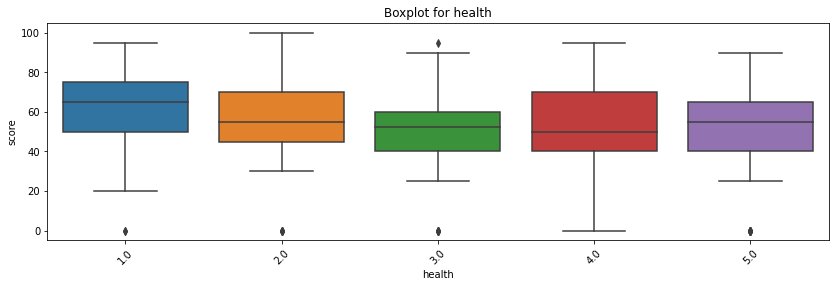

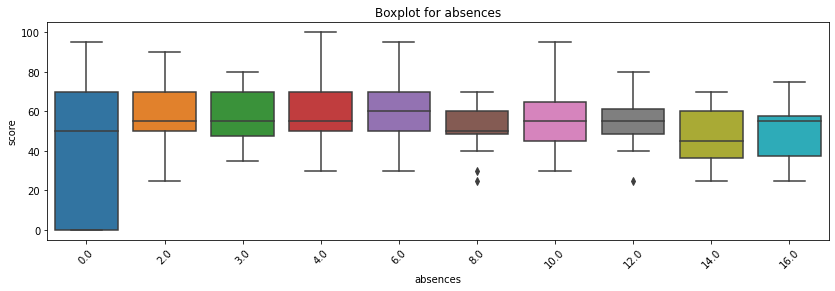

In [119]:
for col in ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_edu', 
                     'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures', 
                     'school_sup', 'family_sup', 'paid', 'activities', 'nursery', 'higher', 
                     'internet', 'romantic', 'family_rel', 'free_time', 'go_out', 'health', 'absences']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:


In [120]:
def get_stat_dif(column):
    cols = stud_math[column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [121]:
for col in ['school', 'sex', 'address', 'family_size', 'parents_status', 'mother_edu', 
                     'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures', 
                     'school_sup', 'family_sup', 'paid', 'activities', 'nursery', 'higher', 
                     'internet', 'romantic', 'family_rel', 'free_time', 'go_out', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mother_job


C:\Users\faina\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
stud_math.info()

# Выводы
    По итогам оценки данных можно выделить следущие важные переменные, которые, возможно, оказывают влияние на балл по экзамену по математике, это: age, mothers_edu, mother_job, father_job, study_time, school_sup, higher, absences.

    Высокие оценки по экзаменам можно увидеть у учеников более молодого возраста (age), но при достижении 20 лет, уровень знаний резко меняется. 
    Также можно увидеть закономерность в баллах и образовании родителей (mothers_edu). Чем лучше образование родителей, тем выше балл студентов. Но неоднозначные оценки при данных о матерях без образования. 
    Особо выделяются параметры о данных работ родителей (mother_job, father_job). Высокие баллы отслеживаются у студентов, у которых родители учителя, а также работники в сфере медицины. 
    Следующим характерным параметром является время на учёбу помимо школы (study_time), что является естественным фактором, ведь чем больше времени студент проводит за внеучебными занятиями, тем выше его балл на экзамене. 
    Интересным параметром в данных является дополнительная образовательная поддержка (school_sup). В нашем примере была выделена закономерность, что при отсутствии дополнительной образовательной поддержки студенты получалли более высокие баллы на экзамене, чем с ней. Эти данные свидетельствует о том, что студенты более усердны при отстутствии дополнительной поддержки. 
    Еще одним характерным параметрам по итогам экзамена является стремление студента получить высшее образование (higher).
    Последний параметр, возможно влияющий на конечный балл, является количество пропущенных занятий absences. Чем больше пропущенных занятий, тем меньше выражена подготовка студента на экзамене.
    
    В целом про качество данных можно сказать, что данные были представлены в хорошем объеме. Были незначительные недочеты и опечатки в данных, которые можно было исправить без искажения общих результатов. Также в данных присутствовали нулевые значения, которые при определенных обстоятельствах можно было дополнить различными методами.